In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,...,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1993.000000,1992.000000,1992.000000
mean,763.729052,-0.284132,0.268119,0.847751,0.150563,-0.077556,0.050103,0.138222,-0.059304,0.010979,...,-0.011001,-0.145318,-0.043286,0.012805,0.108886,0.049115,0.027664,-0.002085,68.545407,0.001004
std,452.521698,1.353415,1.141645,1.012955,1.267075,1.270392,1.272464,1.138954,0.966479,0.902192,...,0.654113,0.587922,0.352364,0.601377,0.408022,0.453781,0.369040,0.272439,241.271049,0.031678
min,0.000000,-11.140706,-12.114213,-12.389545,-4.657545,-32.092129,-3.498447,-4.925568,-12.258158,-3.110515,...,-4.709977,-2.776923,-4.020300,-2.162523,-1.577384,-1.243924,-5.336289,-2.738566,0.000000,0.000000
25%,367.000000,-1.045669,-0.203190,0.278629,-0.672001,-0.576092,-0.691202,-0.284262,-0.172560,-0.479644,...,-0.226941,-0.547474,-0.181176,-0.353695,-0.151028,-0.281097,-0.048656,-0.021053,4.950000,0.000000
50%,752.000000,-0.438337,0.316096,0.864391,0.185755,-0.153240,-0.197943,0.117003,0.037486,-0.035006,...,-0.087329,-0.153895,-0.057041,0.091948,0.133481,0.036992,0.023011,0.022569,15.110000,0.000000
75%,1163.000000,1.095067,0.926177,1.487102,1.002635,0.373344,0.389937,0.567405,0.279559,0.450282,...,0.082710,0.252133,0.064822,0.427849,0.383339,0.303731,0.140879,0.090920,63.750000,0.000000
max,1530.000000,1.685314,6.118940,4.017561,6.013346,7.672544,21.393069,34.303177,3.877662,6.450992,...,6.765928,1.957759,4.095021,1.215279,1.629684,3.463246,3.852046,4.157934,7712.430000,1.000000


In [4]:
df.isnull().sum().max()

1

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
print('No Frauds', round(df['Class'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Class'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 99.85 % of the dataset
Frauds 0.1 % of the dataset


Text(0.5, 1.0, 'Class Distributions')

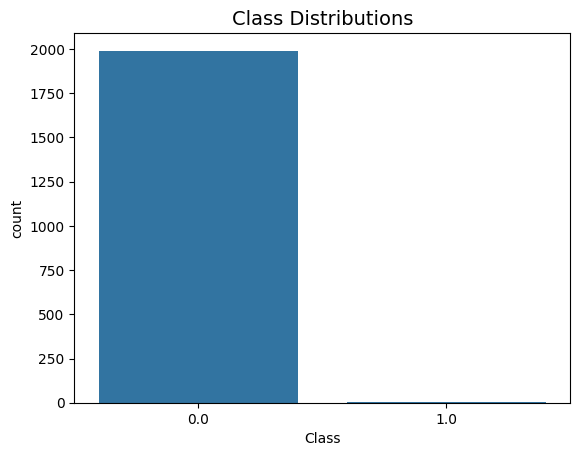

In [7]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions', fontsize=14)

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

df = pd.read_csv('creditcard.csv')

print(df.columns)

if 'id' in df.columns and 'Amount' in df.columns:

    std_scaler = StandardScaler()
    rob_scaler = RobustScaler()


    df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
    df['scaled_id'] = rob_scaler.fit_transform(df['id'].values.reshape(-1,1))


    df.drop(['id', 'Amount'], axis=1, inplace=True)
else:
    print("Columns 'id' and/or 'Amount' not found in the DataFrame")


print(df.head())


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Columns 'id' and/or 'Amount' not found in the DataFrame
   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.22

In [9]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

df = pd.read_csv('creditcard.csv')

print("Columns in the DataFrame:", df.columns)

if 'id' in df.columns and 'Amount' in df.columns:

    std_scaler = StandardScaler()
    rob_scaler = RobustScaler()

    df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
    df['scaled_id'] = rob_scaler.fit_transform(df['id'].values.reshape(-1, 1))

    df.drop(['id', 'Amount'], axis=1, inplace=True)

    scaled_amount = df['scaled_amount']
    scaled_id = df['scaled_id']

    df.drop(['scaled_amount', 'scaled_id'], axis=1, inplace=True)

    df.insert(0, 'scaled_amount', scaled_amount)
    df.insert(1, 'scaled_id', scaled_id)

    print(df.head())
else:
    print("Columns 'id' and/or 'Amount' not found in the DataFrame")


Columns in the DataFrame: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')
Columns 'id' and/or 'Amount' not found in the DataFrame


In [10]:
df=df.sample(frac=1)

fraud_df=df.loc[df['Class']==1]
non_fraud_df=df.loc[df['Class']==0][:120]

normal_distributed_df=pd.concat([fraud_df,non_fraud_df])

new_df=normal_distributed_df.sample(frac=1,random_state=42)

new_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
64460,51155,-11.205461,7.914633,-13.987752,4.333341,-8.484970,-3.506561,-8.935243,7.704449,-2.336584,...,0.942593,-0.987848,-0.279446,-0.027299,0.644344,-0.263078,1.084023,0.211933,99.99,1.0
6719,8415,-0.251471,4.313523,-6.891438,6.796797,0.616297,-2.966327,-2.436653,0.489328,-3.371639,...,0.536892,-0.546126,-0.605240,-0.263743,1.539916,0.523574,0.891025,0.572741,1.00,1.0
15476,26863,-21.209120,12.652197,-23.553933,6.174078,-16.026658,-4.422195,-16.229444,14.116002,-3.922741,...,1.758440,-1.522588,-0.903860,0.130166,1.454857,-0.223214,1.550928,0.461460,99.99,1.0
54445,46453,-0.877390,1.013656,1.163671,-0.080758,-0.128614,-0.110660,0.318335,0.492804,-0.604098,...,0.276222,0.645437,-0.226607,-0.233964,0.167930,0.550061,-0.073387,0.026640,35.89,0.0
20566,31121,-0.006200,0.839497,1.918680,1.319456,-0.544471,-0.272161,0.005376,-0.905770,-0.213768,...,0.486096,-0.875213,-0.219803,0.724086,1.368029,-0.316383,0.131179,0.163617,9.00,0.0


Distribution of the classes is the subsample dataset
Class
1.0    0.591837
0.0    0.408163
Name: count, dtype: float64


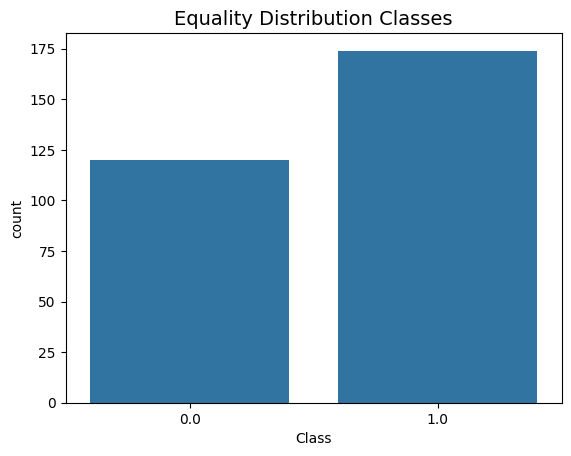

In [11]:
print('Distribution of the classes is the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))

sns.countplot(x='Class',data=new_df)
plt.title('Equality Distribution Classes',fontsize=14)
plt.show()

In [12]:
X=new_df.drop('Class',axis=1)
y=new_df['Class']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [14]:
X_train=X_train.values
X_test=X_test.values
y_train=y_train.values
y_test=y_test.values

In [15]:
classifiers={
    "Support Vector Classifier": SVC()
}

In [16]:
from sklearn.model_selection import cross_val_score

for key, classifier in classifiers.items():
  classifier.fit(X_train,y_train)
  training_score=cross_val_score(classifier, X_train, y_train, cv=5)
  print("Classifiers:", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(),2)*100, "% accuracy score")


Classifiers: SVC Has a training score of 62.0 % accuracy score


In [17]:

svc=SVC()
svc_score=cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Cross Validation Score:', round(svc_score.mean()*100,2).astype(str)+'%')



Support Vector Cross Validation Score: 61.7%


In [18]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

svc_pred=cross_val_predict(svc, X_train, y_train, cv=5, method='decision_function')


In [19]:
from sklearn.metrics import roc_auc_score

print('Support Vector Classifier: ',roc_auc_score(y_train, svc_pred))


Support Vector Classifier:  0.5983141762452107
